# Secretary Problem

A simple empirical investigation into the Secretary Problem. You have $N$ candidate secretaries, each with their own ranking, which is unknown to you until you interview them.

You interview them one at a time, and you hire one and that's it. If you get to the end, you have to hire that last one. 

In [44]:
import random
import numpy   as np
import seaborn as sns

sns.set()
sns.set(rc={'figure.figsize':(20, 10)})

In [4]:
a = list(range(1, 10))
random.shuffle(a)
a

[1, 7, 4, 3, 2, 8, 6, 5, 9]

The strategy: we will interview the first $k$ of the $N$ total secretaries, and not hire any of them. We will then take the first secretary that ranks higher than the first $k$, or the last one. 

In [5]:
def find_secretary(num_secretaries, num_to_test):
    l = list(range(1, num_secretaries + 1))
    random.shuffle(l)
    min_so_far = num_secretaries
    
    for i in range(0, num_to_test):
        if l[i] < min_so_far:
            min_so_far = l[i]
    
    for i in range(num_to_test, num_secretaries):
        if l[i] < min_so_far:
            return(l[i])
    
    return l[-1]

In [42]:
def run_trials(num_secretaries, num_trials):
    l1 = []
    l2 = []
    for i in range(0, num_secretaries):
        if i % 100 == 0:
            print(i)
        trials = [find_secretary(num_secretaries, i) for x in range(num_trials)]
        l1.append(np.mean(trials))
        l2.append(np.sum([1 if x == 1 else 0 for x in trials]))
    return((l1, l2))

In [43]:
results = run_trials(1000, 100)

0
100
200
300
400
500
600
700
800
900


Now we simply plot the efficacy against our parameter $k$, and you can eyeball that we hit the maximum at about $1000/e$ and the max is about $1/e$. 

<AxesSubplot:>

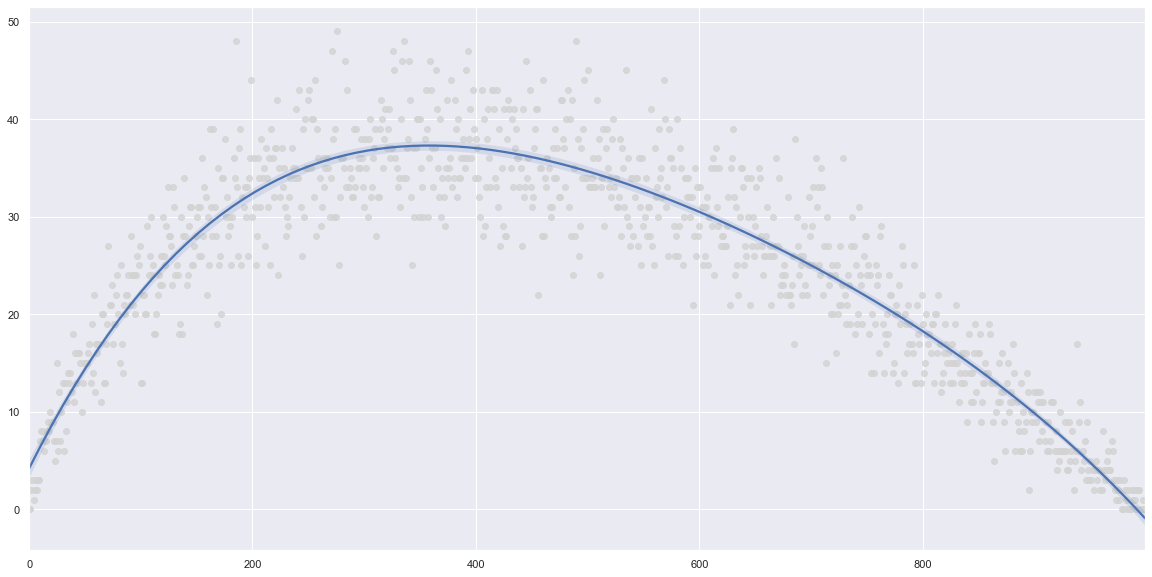

In [55]:
sns.regplot(x = list(range(1000)), y = results[1], order = 4, scatter_kws={"color": "lightgray"})

<AxesSubplot:>

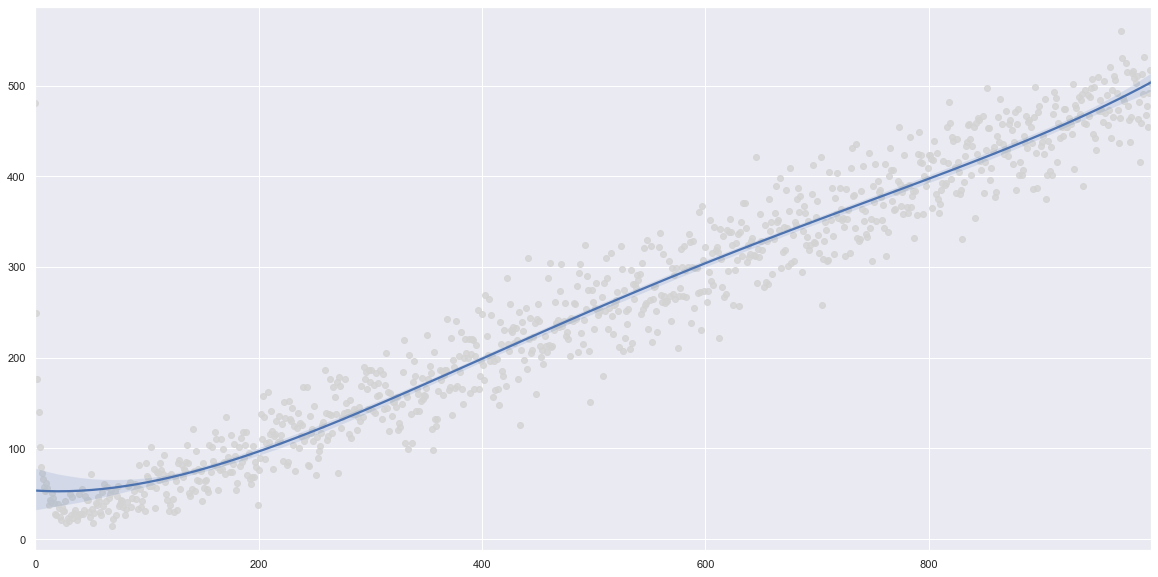

In [56]:
sns.regplot(x = list(range(1000)), y = results[0], order = 4, scatter_kws={"color": "lightgray"})